# clone the v5

In [ ]:
import torch
print(torch.version.cuda)

12.1


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
!cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 17265 (delta 107), reused 60 (delta 60), pack-reused 17079 (from 2)
Receiving objects: 100% (17265/17265), 15.92 MiB | 15.07 MiB/s, done.
Resolving deltas: 100% (11808/11808), done.


# using

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 198.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 182.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 8.6s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-6-2 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 135MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# with 2 images

In [ ]:
img = cv2.imread('/content/sensors-20-03245-g010.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
results = model(img)

WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
results.print()

image 1/1: 1034x1877 5 persons, 1 car, 3 airplanes, 2 buss, 1 train, 1 horse, 1 cow, 1 elephant, 1 kite, 2 tennis rackets
Speed: 12.8ms pre-process, 114.2ms inference, 1090.6ms NMS per image at shape (1, 3, 352, 640)


In [ ]:
%matplotlib inline

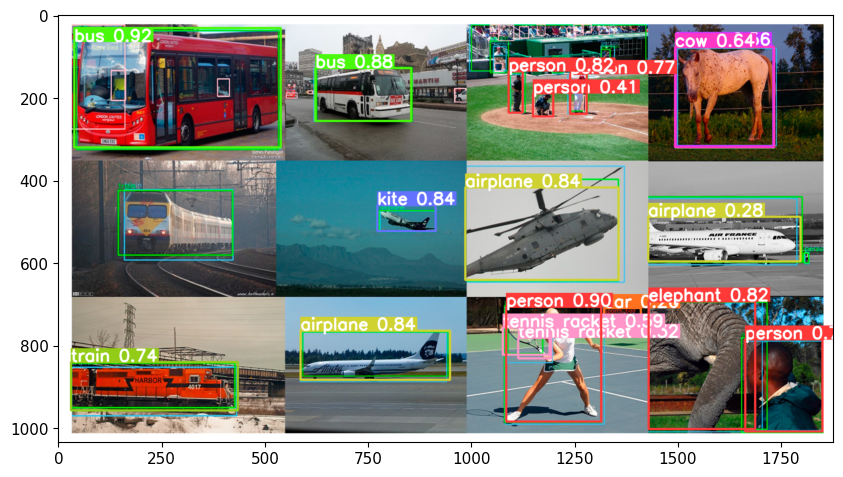

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(np.squeeze(results.render()))
plt.show()

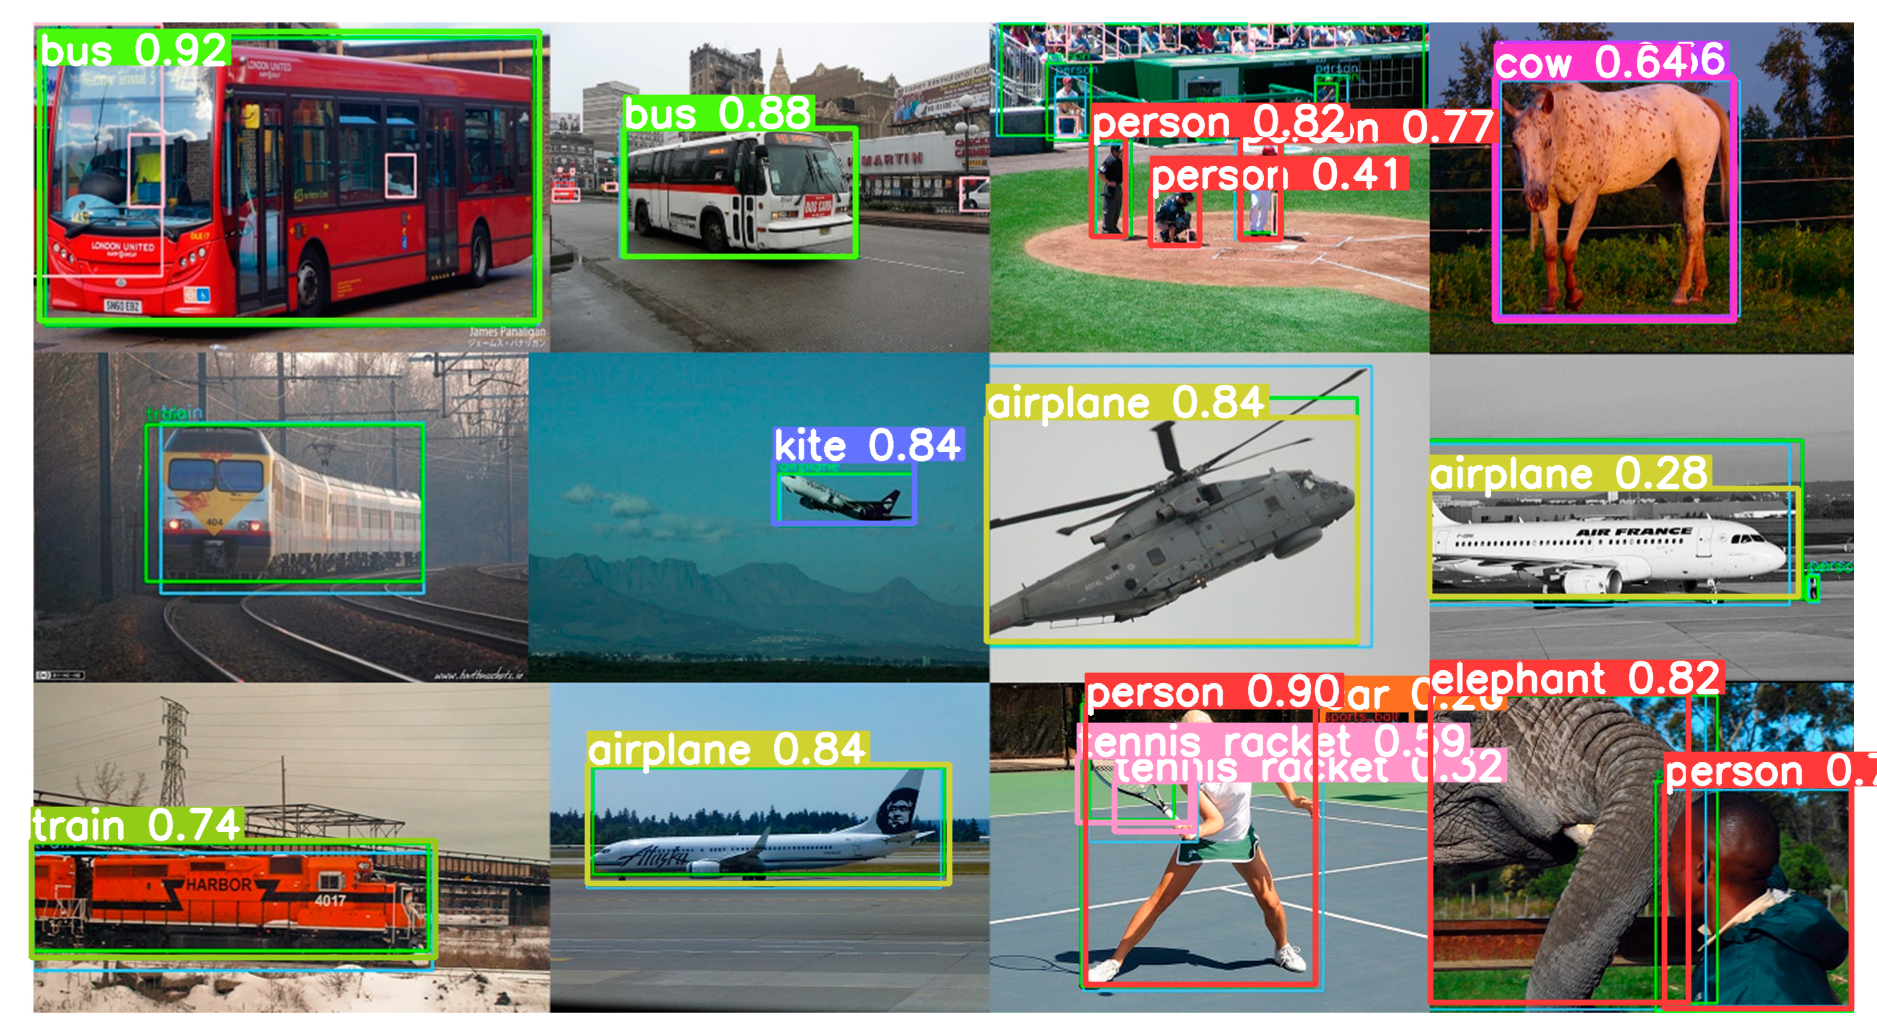

In [ ]:
results.show()

# train from scratch

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 20 --data dataset.yml --weights yolov5s.pt --workers 2

2024-05-09 14:52:56.064901: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 14:52:56.064979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 14:52:56.238524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, opt

# inference for our custom model

In [ ]:
custom_model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/drive/MyDrive/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-17 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
custom_model.conf = 0.6

In [ ]:
custom_model.iou = 0.6

In [ ]:
img = cv2.imread('/content/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
results = custom_model(img)

In [ ]:
results.print()

image 1/1: 640x640 1 Fire
Speed: 2.7ms pre-process, 13.0ms inference, 2.9ms NMS per image at shape (1, 3, 640, 640)


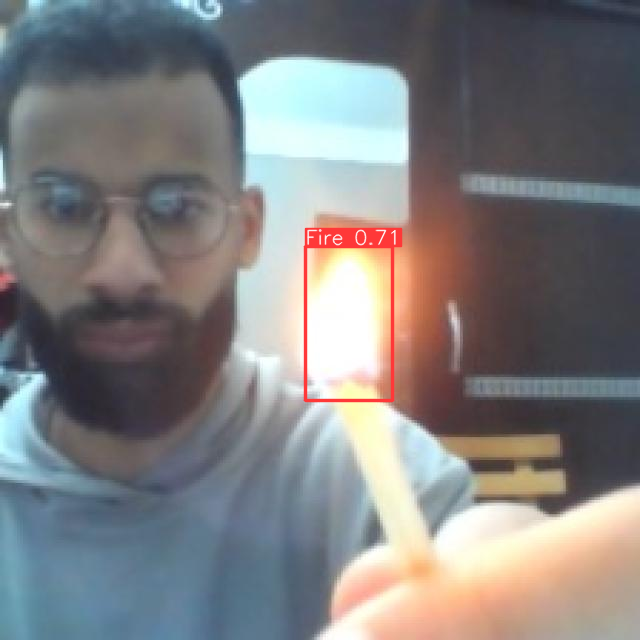

In [ ]:
results.show()

In [ ]:
x = results.pred

In [ ]:
# prompt: change from tensor lists

X = [item.tolist() for item in x]


In [ ]:
X[0][0][4]

0.714582085609436

In [ ]:
for i in X[0]:
  print(i[4])

0.714582085609436
0.5299139022827148


In [ ]:
x

[tensor([[305.98111, 246.84721, 392.49277, 400.03687,   0.71458,   0.00000],
         [428.66776, 283.38382, 482.58023, 403.15628,   0.52991,   0.00000]], device='cuda:0')]

In [ ]:
print(x[0][1][4])

tensor(0.52991, device='cuda:0')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
